## Final PHASE 3 PROJECT Submission
* Student name: MUTISYA FAITH MWENDE
* Student pace: part-time

# **Analyzing Predictive Factors and Bias in Arrest Outcomes During Terry Stops: A Classification Approach**

## **Background**

Terry v. Ohio, a landmark U.S. Supreme Court case decided in 1968, established the principle of **"reasonable suspicion,"** which allows police officers to temporarily detain individuals based on suspicious behavior, even in the absence of probable cause required for arrest. These stops, known as **Terry Stops**, have become a standard police practice, particularly in situations involving suspicious drivers. While Terry Stops are intended to prevent crime and ensure public safety, they have also raised significant concerns about potential bias in law enforcement, particularly regarding **race and gender**.

In recent years, the role of race and other demographic factors in policing has come under intense scrutiny. Research has suggested that certain demographic groups may be disproportionately affected by police practices, leading to questions about the fairness and objectivity of these interactions. This project aims to explore these issues by building a machine learning classifier to predict whether an arrest was made during a Terry Stop are affected by presence of weapons, time of day, gender, and race.

## **Problem Statement**

While Terry Stops are legally justified under the principle of "reasonable suspicion," there is ongoing debate about whether these stops are conducted in a manner that is free from bias. The core problem this project seeks to address is whether certain factors, particularly race and gender, disproportionately influence the likelihood of arrest during a Terry Stop. Understanding these dynamics is crucial for law enforcement agencies, policymakers, and the public as they work to ensure that policing practices are fair, transparent, and just.

This project will focus on developing a classification model to predict arrest outcomes during Terry Stops. The model will analyze various factors, including demographic information, to determine which variables most strongly influence the likelihood of an arrest. By doing so, the project aims to shed light on potential biases in policing practices and offer insights that could guide more equitable law enforcement strategies.

## **Objectives**

1. **Data Exploration and Understanding**:
   - This will involve analyzing the distribution of key variables, particularly those related to demographics such as race and gender, as well as other critical factors like the presence of weapons and the time of day. Additionally, any data quality issues, such as missing values or outliers, will be identified and appropriately addressed to ensure the reliability of the analysis and subsequent modeling.

2. **Model Development**:
   - Build a baseline classification model using logistic regression to predict whether an arrest was made during a Terry Stop.
   - Develop a decision tree model as an alternative approach, comparing its performance with the logistic regression model.

3. **Feature Importance Analysis**:
   - This will involve identifying the most influential features in predicting arrest outcomes, with particular attention given to demographic factors such as race and gender. Sensitivity analyses will be performed to assess how changes in these key features impact the model’s predictions, providing deeper insights into the factors driving arrest decisions during Terry Stops.

4. **Evaluation of Model Performance**:

   - This will be done using appropriate classification metrics, including accuracy, precision, recall, and the F1 score.  By comparing the performance of the logistic regression and decision tree models, the project will determine the most effective approach for predicting arrest outcomes in the context of Terry Stops.

5. **Ethical Considerations and Recommendations**:
   - Discuss the ethical implications of using demographic data in predictive policing models, with a focus on the potential for bias and discrimination.
   - Provide recommendations for law enforcement agencies based on the findings, aimed at promoting fairer and more transparent policing practices.

### **Data Exploration and understanding**

In [114]:
# Importing dictonaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Loading the dataset


In [115]:
# Load the dataset
df = pd.read_csv('Terry_Stops_20240831.csv')

In [116]:
# Displaying the first few rows of the dataset
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,46 - 55,-1,20170000170940,265604,Offense Report,None,5167,1967,M,White,...,16:28:00.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT OPS - CPT,N,N,West,Q,Q1
1,46 - 55,31037044483,20220000095762,32872287472,Field Contact,-,6805,1973,M,White,...,12:10:26.0000000,BURG - COMM BURGLARY,--BURGLARY - NON RESIDENTIAL/COMMERCIAL,911,WEST PCT 1ST W - KQ/DM RELIEF,N,N,-,-,-
2,18 - 25,-1,20170000000631,239079,Field Contact,Lethal Cutting Instrument,7580,1982,M,Hispanic or Latino,...,07:24:00.0000000,-,-,-,NORTH PCT OPS - ACT DAY,N,Y,North,L,L2
3,18 - 25,8754606833,20190000205676,8301110425,Offense Report,-,6115,1968,M,White,...,16:55:35.0000000,-,-,-,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,N,N,North,B,B2
4,36 - 45,-1,20170000002861,283726,Field Contact,None,6090,1961,M,White,...,23:03:00.0000000,-,-,-,SOUTH PCT 3RD W - OCEAN - PLATOON 2,N,N,-,-,-


The table displays the first five rows of the dataset. Each row corresponds to a Terry stop, and the columns provide various attributes such as the subject's age group, officer details, stop resolution, and various flags indicating the outcome of the stop. Key columns include:

- Subject Age Group: The age range of the subject involved in the stop.
- Officer ID and Officer YOB: Information about the officer who conducted the stop.
- Stop Resolution: The outcome of the stop (e.g., offense report, field contact).
- Arrest Flag: Indicates whether an arrest was made during the stop.

In [117]:
# Checking for missing values
df.isnull().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               561
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [118]:
# Data description
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,6.106800e+04,6.106800e+04,6.106800e+04,61068.000000
mean,7.305589e+09,2.018669e+13,1.221189e+10,1984.086903
std,1.275384e+10,8.570641e+10,1.758180e+10,9.471079
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.017000e+13,2.393990e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,5.095875e+05,1986.000000
75%,7.753004e+09,2.021000e+13,1.973751e+10,1991.000000
max,5.861931e+10,2.024000e+13,5.863837e+10,2002.000000


- Count: This represents the total number of non-null entries in each column
- Mean: This is the average value for each column.
- Standard Deviation (std): This indicates the variability or dispersion of the data points from the mean
- Min and Max:These values show the smallest and largest entries in each column
- Percentiles (25%, 50%, 75%):These values represent the distribution of the data:
  -  25% (first quartile): 25% of the data falls below this value.
  - 50% (median): The middle value of the dataset.
  -  75% (third quartile): 75% of the data falls below this value.


In [119]:
df.columns


Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

Provides for a list of all available colums in the dataset.

In [120]:
# Checking the unique values in the 'Arrest Flag' column
df['Arrest Flag'].unique()


array(['N', 'Y'], dtype=object)

'N' means no arrest was made 
'Y' means that an arrests made. 

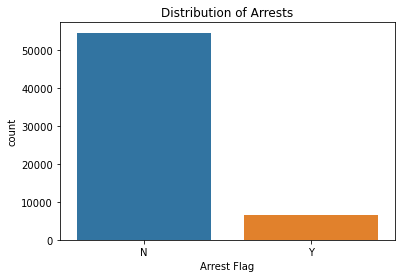

In [121]:
# Visualizing the arrests made.
sns.countplot(x='Arrest Flag', data=df)
plt.title('Distribution of Arrests')
plt.show()



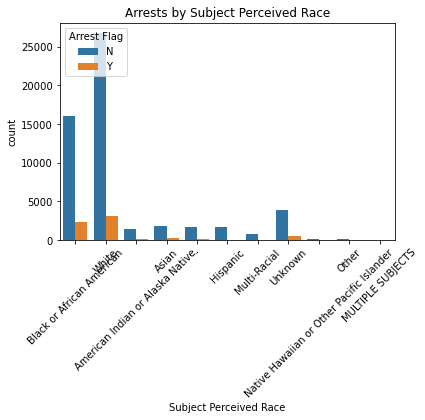

In [122]:
# Visualizing the distribution of arrests by the perceived race of the subject
sns.countplot(x='Subject Perceived Race', hue='Arrest Flag', data=df)
plt.title('Arrests by Subject Perceived Race')
plt.xticks(rotation=45)  # Rotating x-axis labels for readability
plt.show()


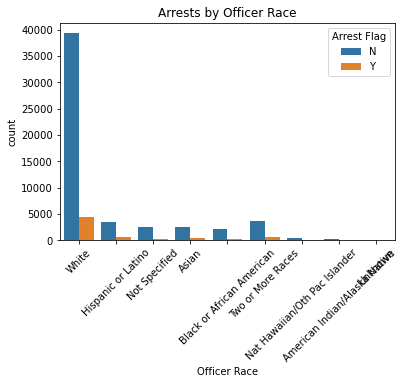

In [123]:
# Visualizing the distribution of arrests by officer race
sns.countplot(x='Officer Race', hue='Arrest Flag', data=df)
plt.title('Arrests by Officer Race')
plt.xticks(rotation=45)  # Rotating the x-axis labels for readability
plt.show()


**Explanation**
 - `Officer Race` column to analyze the distribution of arrests made by officers of different racial backgrounds. The visualization shows that their is a likelihood of being arrested by officers of certain races.
   - For example, white officers have a higher likelihood to arrest an individual based on race. 

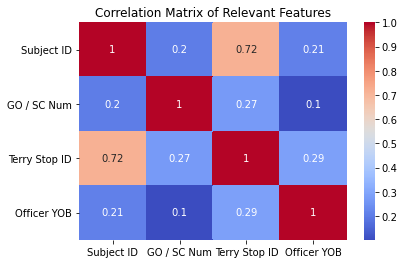

In [124]:
# Correlation matrix visualisation
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Relevant Features')
plt.show()


**Explanation**
1. Variables with high correlation:
   - **Subject ID and Terry Stop ID**: A correlation coefficient of 0.72 indicates a strong positive correlation. This suggests that as the Subject ID increases, the Terry Stop ID also tends to increase.
   - **GO / SC Num and Terry Stop ID**: A correlation coefficient of 0.27 indicates a moderate positive correlation.

 2. Variables with a low correlation:
    - **Subject ID and GO / SC Num**: A correlation coefficient of 0.2 indicates a weak positive correlation.
    - **Officer YOB and other variables**: The correlations between Officer YOB and other variables are generally low (e.g., 0.21 with Subject ID, 0.1 with GO / SC Num, and 0.29 with Terry Stop ID), indicating that the officer's year of birth does not strongly correlate with these variables.


## Data cleaning

In [125]:
#Importing relevant dictonaries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [126]:
#Dropping the null values/missing values
df = df.dropna()


In [127]:
# Checking for missing values
df.isnull().sum()

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

In [128]:
# Encoding categorical variables
le = LabelEncoder()
df['Subject Perceived Race'] = le.fit_transform(df['Subject Perceived Race'])
df['Subject Perceived Gender'] = le.fit_transform(df['Subject Perceived Gender'])

In [129]:
# Identify categorical and numerical columns
categorical_cols = [
    'Subject Perceived Race', 
    'Subject Perceived Gender', 
    'Officer Gender', 
    'Officer Race', 
    'Call Type', 
    'Initial Call Type', 
    'Final Call Type', 
    'Officer Squad', 
    'Sector', 
    'Precinct'
]
numerical_cols = [
    'Officer YOB', 
    'Subject Age Group', 
    'Weapon Type'  # Adjust if 'Weapon Type' needs encoding or scaling
]

In [136]:
# Split the data into features and target
X = df.drop('Arrest Flag', axis=1)
y = df['Arrest Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_processed = preprocessor.transform(X_test)

In [137]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_processed = preprocessor.transform(X_test)

ValueError: A given column is not a column of the dataframe

## Modelling

### **Logistics Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_processed, y_train)



print("\nLogistic Regression Model")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))


### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_processed, y_train)

# Predictions
dt_pred = dt_model.predict(X_test_processed)
lr_pred = lr_model.predict(X_test_processed)

# Evaluation
print("Decision Tree Model")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print("Accuracy:", accuracy_score(y_test, dt_pred))


### **Feature Visualisation for Decision Trees**

In [ ]:
importances = dt_model.feature_importances_
features = preprocessor.transformers_[0][1].get_feature_names_out(numerical_cols).tolist() + \
            preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols).tolist()
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importance in Decision Tree')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### **ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = lr_model.predict_proba(X_test_processed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
